# FIFA-18 Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fifa_data = pd.read_csv('fifa 18.csv')
fifa_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Task-1: Overall Rating Distribution in FIFA-18

### Histogram

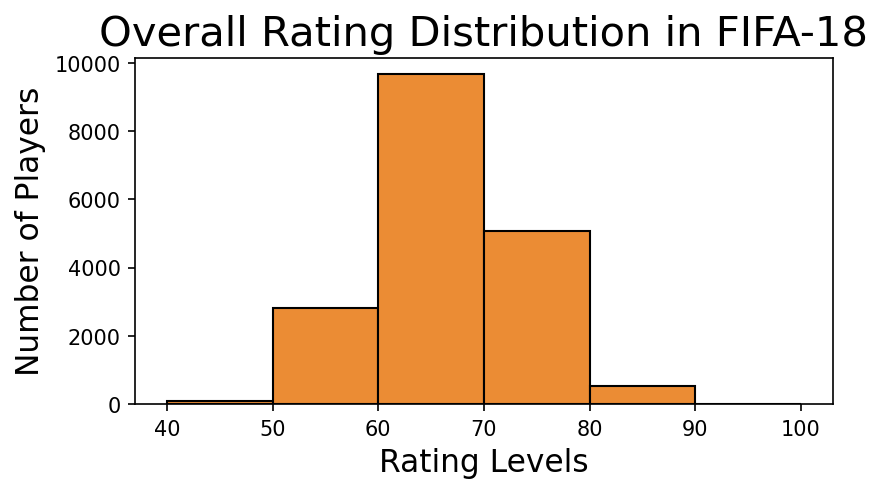

In [31]:
bins = [40, 50, 60, 70, 80, 90, 100]

plt.figure(figsize = (6,3), dpi = 150)

plt.hist(fifa_data.Overall, bins = bins, color = '#eb8c34', edgecolor = 'black')

plt.title('Overall Rating Distribution in FIFA-18', fontdict = {'fontsize':20})
plt.xlabel('Rating Levels', fontsize = 15)
plt.ylabel('Number of Players', fontsize = 15)

plt.xticks(bins)
plt.savefig('Overall rating distribution.png', bbox_inches='tight')
plt.show()

## Preferred Foot Distribution

### Pie-Chart

In [4]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

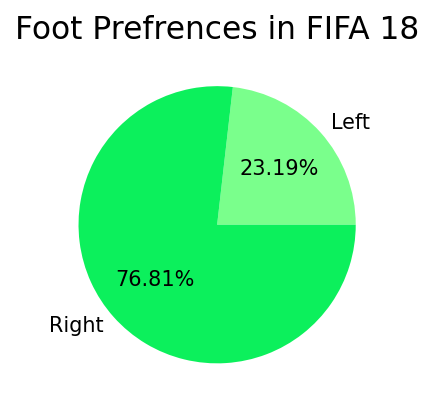

In [32]:
left = fifa_data.loc[fifa_data['Preferred Foot'] == 'Left'].count()[0]
right = fifa_data.loc[fifa_data['Preferred Foot'] == 'Right'].count()[0]

label = ['Left', 'Right']
color = ['#7aff8c', '#0cf05c']

plt.figure(figsize=(6,3), dpi = 150)
plt.pie([left, right], labels = label, colors = color, autopct = '%.2f%%')

plt.title('Foot Prefrences in FIFA 18', fontdict = {'fontsize': 15})

plt.savefig('Foot prefrences.png')
plt.show()

## Weight Distribution of Players

### Advanced Pie Chart

In [7]:
fifa_data.Weight

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

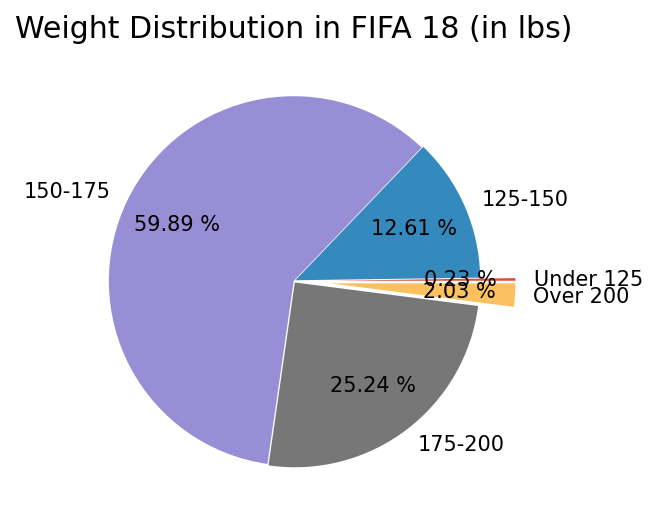

In [33]:
fifa_data.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa_data.Weight]
plt.style.use('ggplot')

# fifa_data.Weight
light = fifa_data.loc[fifa_data.Weight < 125].count()[0]
light_medium = fifa_data.loc[(fifa_data.Weight >= 125) & (fifa_data.Weight < 150)].count()[0]
medium = fifa_data.loc[(fifa_data.Weight >= 150) & (fifa_data.Weight < 175)].count()[0]
medium_heavy = fifa_data.loc[(fifa_data.Weight >= 175) & (fifa_data.Weight < 200)].count()[0]
heavy = fifa_data.loc[fifa_data.Weight > 200].count()[0]

plt.figure(figsize=(7,4), dpi = 150)

weight = [light, light_medium, medium, medium_heavy, heavy]

labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']

explode = [.2, .01, 0, .01, .2]

plt.title('Weight Distribution in FIFA 18 (in lbs)')

plt.pie(weight, labels = labels, autopct = '%.2f %%', pctdistance = 0.7, explode = explode)

plt.savefig('Weight Distribution in FIFA 18 (in lbs).png')
plt.show()

## Club wise Players Rating Comparison

### Boxplot

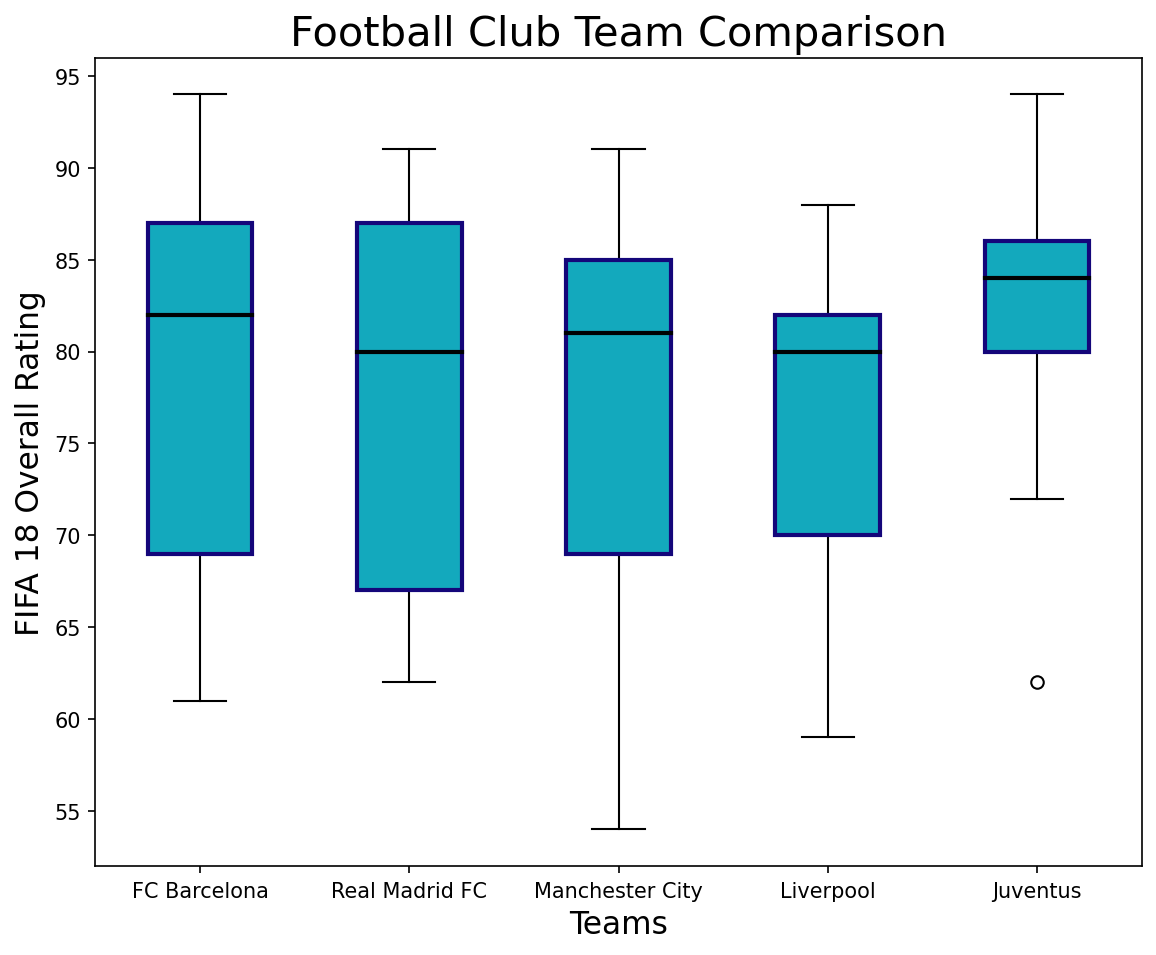

In [34]:
plt.style.use('default')

barca = fifa_data.loc[fifa_data.Club == 'FC Barcelona']['Overall'] 
madrid = fifa_data.loc[fifa_data.Club == 'Real Madrid']['Overall'] 
man_city = fifa_data.loc[fifa_data.Club == 'Manchester City']['Overall']
liv = fifa_data.loc[fifa_data.Club == 'Liverpool']['Overall']
juv = fifa_data.loc[fifa_data.Club == 'Juventus']['Overall']
labels = ['FC Barcelona', 'Real Madrid FC', 'Manchester City', 'Liverpool', 'Juventus']

plt.figure(figsize=(9,7), dpi = 150)

plt.title('Football Club Team Comparison', fontsize = 20)

plt.ylabel('FIFA 18 Overall Rating', fontsize = 15)
plt.xlabel('Teams', fontsize = 15)

boxes = plt.boxplot([barca, madrid, man_city, liv, juv], labels = labels, patch_artist = True, medianprops = {'linewidth': 2, 'color':'#000203'})

for box in boxes['boxes']:
#     set edge color
    box.set(color = '#14067a', linewidth = 2)
#     set fill color
    box.set(facecolor = '#13a9bd')

plt.savefig('FIFA 18 Overall Rating.png')
plt.show()

## Weakly Wage Comparison of Top Players in 'K'

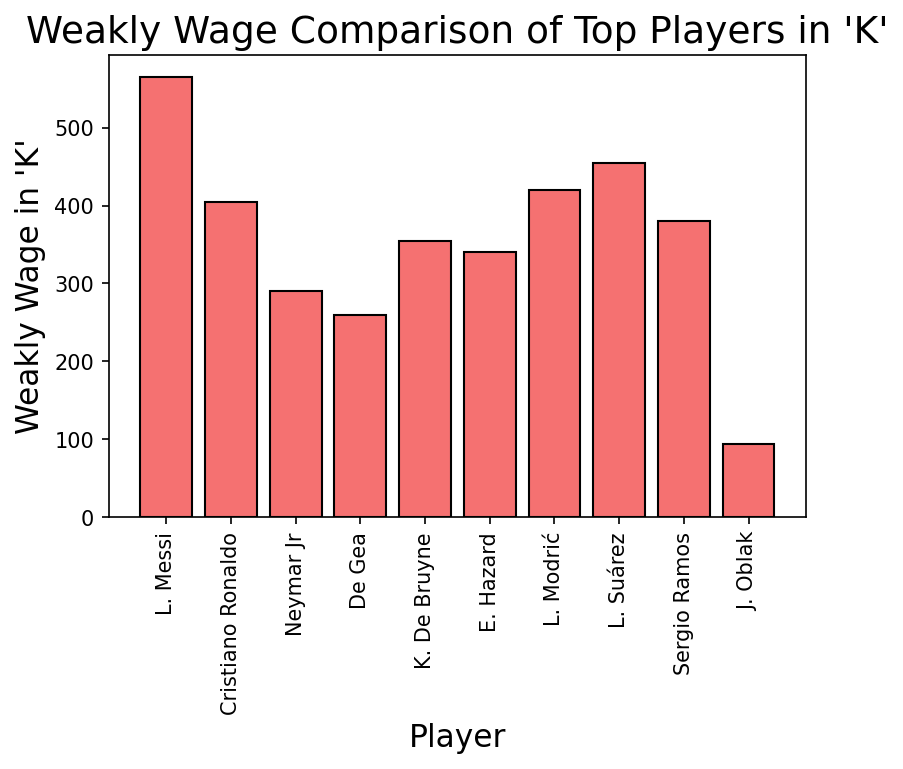

In [35]:
plt.style.use('default')
plt.figure(figsize=(6,4), dpi = 150)

plt.bar(fifa['Name'], fifa['Wage'], color = '#f57171', edgecolor = 'Black')

plt.title("Weakly Wage Comparison of Top Players in 'K'", fontsize = 18)

plt.xticks(fifa['Name'], rotation = 'vertical')


plt.xlabel('Player', fontsize = 15)
plt.ylabel("Weakly Wage in 'K'", fontsize = 15)

plt.savefig('players wage.png')
plt.show()

In [27]:
fifa = fifa_data.head(10)
fifa

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
